In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 「milkdrop.bmp」を読み込み，画像を表示せよ．

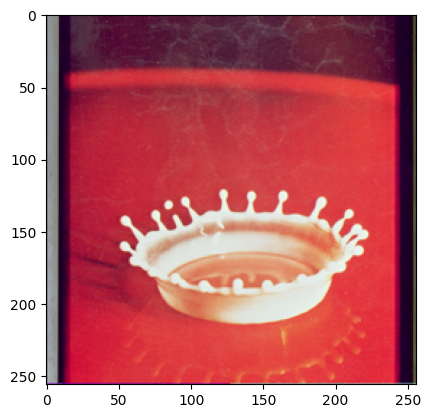

In [2]:
# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 画像の表示
plt.imshow(image_rgb)

# 「milkdrop.bmp」を読み込み，5x5の平均フィルタを画像に適用し，結果を表示せよ．

In [3]:
# 平滑化フィルタ用の関数
def apply_kernel(image, kernel):
    # 画像の高さと幅を取得
    height, width = image.shape[:2]
    kernel_size = kernel.shape[0]  # カーネルのサイズ
    pad = kernel_size // 2  # 畳み込みのためのパディングサイズ
    
    # 結果を格納する配列（元の画像と同じサイズ）
    result = np.zeros((height, width, 3), dtype=np.float32)
    
    # 畳み込み処理
    for i in range(pad, height-pad):
        for j in range(pad, width-pad):
            for d in range(3):
                # 現在のピクセル周囲のカーネルサイズに応じた領域を抽出
                region = image[i-pad:i+pad+1, j-pad:j+pad+1, d]

                # カーネル適用
                filtered_value = np.sum(region * kernel)
                
                # 結果を格納
                result[i, j, d] = filtered_value
                  
    # クリッピング（0から255の範囲に制限）
    result = np.clip(result, 0, 255)

    # 浮動小数点から符号なし整数に型変換
    result = result.astype(np.uint8)
    
    return result

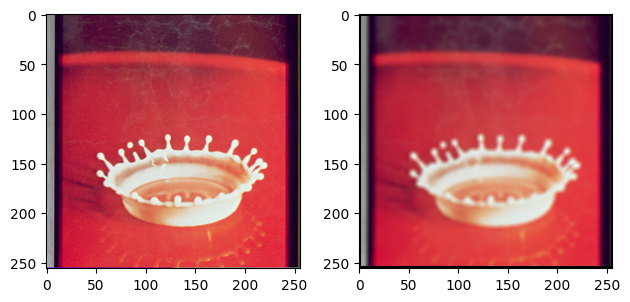

In [5]:
# カーネル定義
kernel = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                   [1/25, 1/25, 1/25, 1/25, 1/25],
                   [1/25, 1/25, 1/25, 1/25, 1/25],
                   [1/25, 1/25, 1/25, 1/25, 1/25],
                   [1/25, 1/25, 1/25, 1/25, 1/25]])

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

# 「milkdrop.bmp」を読み込み，9x9の平均フィルタを画像に適用し，結果を表示せよ．

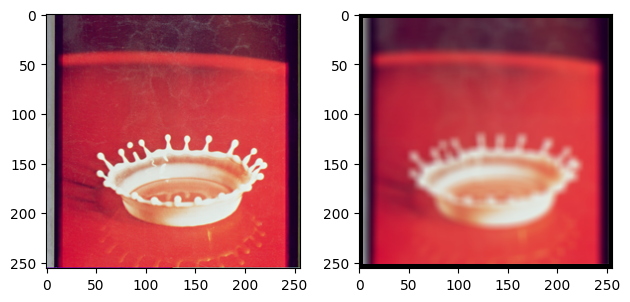

In [6]:
# カーネル定義
kernel = np.array([[1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81],
                   [1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81, 1/81]])
              

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

# 「milkdrop.bmp」を読み込み，中央のピクセルに重み1/3，その他の周辺ピクセルにはそれぞれ1/12の重みを割り当てた3x3加重平均フィルタのカーネルを画像に適用し，結果を表示せよ．

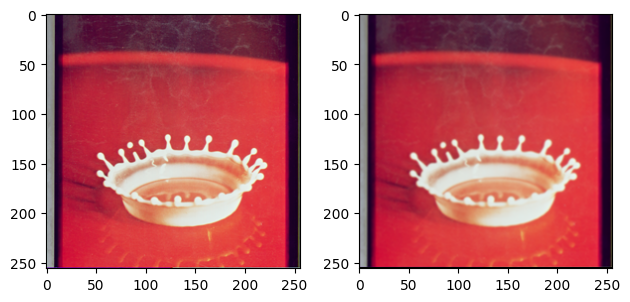

In [7]:
# カーネル定義
kernel = np.array([[1/12, 1/12, 1/12], [1/12, 1/3, 1/12], [1/12, 1/12, 1/12]])

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

# 「milkdrop.bmp」を読み込み，標準偏差が1.0の5x5ガウシアンフィルタのカーネルを画像に適用し，結果を表示せよ．

In [8]:
# ガウシアンフィルタのカーネル定義
def generate_gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    for x in range(size):
        for y in range(size):
            x_diff = (x - center) ** 2
            y_diff = (y - center) ** 2
            kernel[x, y] = np.exp(-(x_diff + y_diff) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)  # カーネルの合計が1になるように正規化
    return kernel

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.02193823 0.09832032 0.1621028  0.09832032 0.02193823]
 [0.01330621 0.05963429 0.09832032 0.05963429 0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


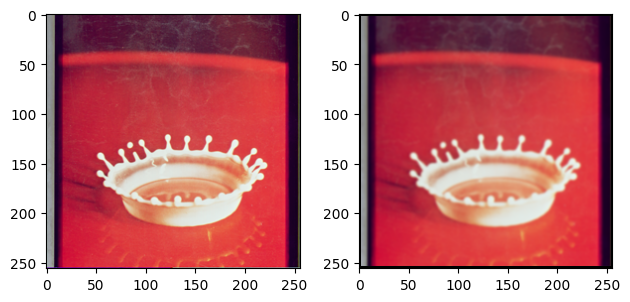

In [12]:
# 標準偏差σ=1.0でカーネルを生成
kernel = generate_gaussian_kernel(5, 1.0)
print(kernel)

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

# 「milkdrop.bmp」を読み込み，標準偏差が2.0の9x9ガウシアンフィルタのカーネルを画像に適用し，結果を表示せよ．

[[0.00076345 0.00183142 0.00342153 0.0049783  0.00564116 0.0049783
  0.00342153 0.00183142 0.00076345]
 [0.00183142 0.00439334 0.00820783 0.01194233 0.01353243 0.01194233
  0.00820783 0.00439334 0.00183142]
 [0.00342153 0.00820783 0.01533425 0.02231121 0.02528191 0.02231121
  0.01533425 0.00820783 0.00342153]
 [0.0049783  0.01194233 0.02231121 0.03246261 0.03678495 0.03246261
  0.02231121 0.01194233 0.0049783 ]
 [0.00564116 0.01353243 0.02528191 0.03678495 0.04168282 0.03678495
  0.02528191 0.01353243 0.00564116]
 [0.0049783  0.01194233 0.02231121 0.03246261 0.03678495 0.03246261
  0.02231121 0.01194233 0.0049783 ]
 [0.00342153 0.00820783 0.01533425 0.02231121 0.02528191 0.02231121
  0.01533425 0.00820783 0.00342153]
 [0.00183142 0.00439334 0.00820783 0.01194233 0.01353243 0.01194233
  0.00820783 0.00439334 0.00183142]
 [0.00076345 0.00183142 0.00342153 0.0049783  0.00564116 0.0049783
  0.00342153 0.00183142 0.00076345]]


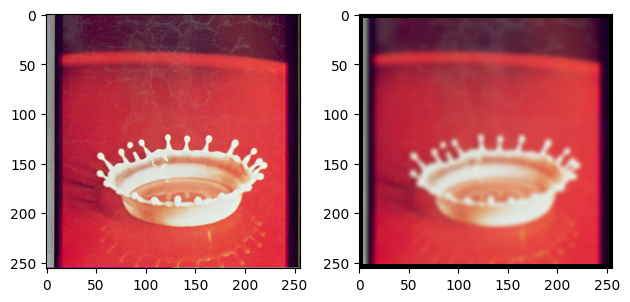

In [14]:
# 標準偏差σ=1.0でカーネルを生成
kernel = generate_gaussian_kernel(9, 2.0)
print(kernel)

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# OpenCVでは画像がBGRで読み込まれるため、RGBに変換（表示のため）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# カーネルを適用
smoothed_image = apply_kernel(image_rgb, kernel)

# 結果を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_rgb)
axes[1].imshow(smoothed_image)

# 「milkdrop.bmp」を読み込み，横方向のエッジを検出するためのカーネル[[0, 0, 0], [0, -1, 1], [0, 0, 0]]を適用し，結果を表示せよ

In [15]:
# 微分カーネル用の関数
def apply_kernel_gray(image, kernel):
    # 画像の高さと幅を取得
    height, width = image.shape[:2]
    kernel_size = kernel.shape[0]  # カーネルのサイズ
    pad = kernel_size // 2  # 畳み込みのためのパディングサイズ
    
    # 結果を格納する配列（元の画像と同じサイズ）
    result = np.zeros((height, width), dtype=np.float32)
    
    # 畳み込み処理
    for i in range(pad, height-pad):
        for j in range(pad, width-pad):
       
            # 現在のピクセル周囲のカーネルサイズに応じた領域を抽出
            region = image[i-pad:i+pad+1, j-pad:j+pad+1]

            # カーネル適用
            filtered_value = np.sum(region * kernel)
            
            # 結果を格納
            result[i, j] = filtered_value

    # 浮動小数点から符号あり整数に型変換
    result = result.astype(np.int16)
    
    return result

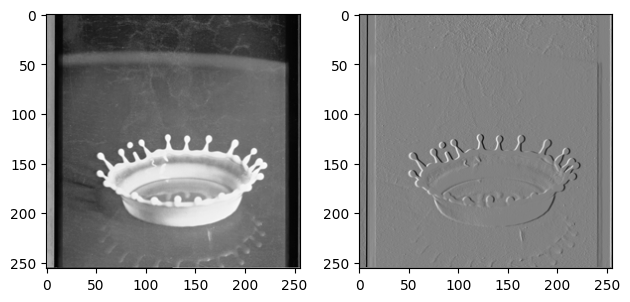

In [16]:
# カーネル定義
kernel = np.array([[0, 0, 0],[0, -1, 1],[0, 0, 0]])

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルを適用
edge_image = apply_kernel_gray(image_gray, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_gray, cmap="gray")
axes[1].imshow(edge_image, cmap="gray")

# 「milkdrop.bmp」を読み込み，縦方向のエッジを検出するためのカーネル[[0, -1, 0], [0, 1, 0], [0, 0, 0]]を適用し，結果を表示せよ．

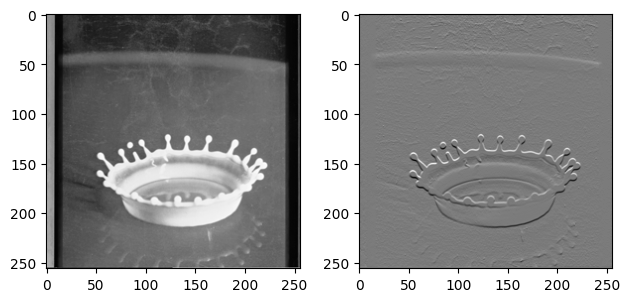

In [17]:
# カーネル定義
kernel = np.array([[0, -1, 0],[0, 1, 0],[0, 0, 0]])

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルを適用
edge_image = apply_kernel_gray(image_gray, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_gray, cmap="gray")
axes[1].imshow(edge_image, cmap="gray")

# 「milkdrop.bmp」を読み込み，縦方向のソーベルフィルタをグレースケール画像に適用し，結果を表示せよ．

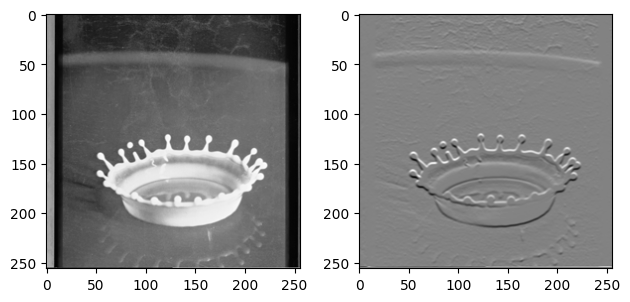

In [18]:
# カーネル定義
kernel = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネルを適用
edge_image = apply_kernel_gray(image_gray, kernel)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_gray, cmap="gray")
axes[1].imshow(edge_image, cmap="gray")

# 「milkdrop.bmp」を読み込み，横方向と縦方向の両方のソーベルフィルタをグレースケール画像に適用し，結果を表示せよ（横方向と縦方向のエッジ画像の二乗和の平方根を計算すること）．

[[    0.     0.     0. ...     0.     0.     0.]
 [    0. 71824.   225. ... 52900. 36864.     0.]
 [    0. 70756.   324. ... 54756. 36100.     0.]
 ...
 [    0. 75076.  1444. ... 61504. 72361.     0.]
 [    0. 52441.   784. ... 43264. 52441.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]


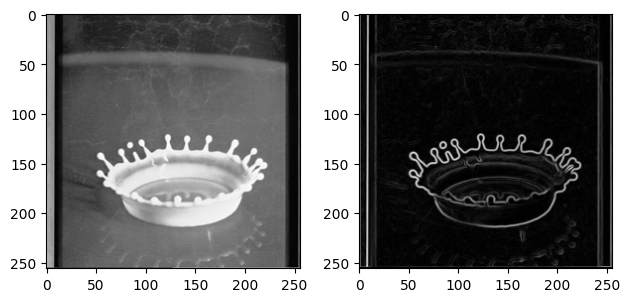

In [25]:
# カーネル定義（横）
kernel_h = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])

# カーネル定義（縦）
kernel_v = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

# 画像ファイルの読み込み
image = cv2.imread('samples/milkdrop.bmp')

# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# カーネル（横）を適用
edge_image_h = apply_kernel_gray(image_gray, kernel_h)

# カーネル（縦）を適用
edge_image_v = apply_kernel_gray(image_gray, kernel_v)

# 二乗和の平方根を計算してエッジ画像を得る（勾配をベクトルとして，その大きさを算出）
edge_image_h = edge_image_h.astype(np.float32)
edge_image_v = edge_image_v.astype(np.float32)
edge_image = np.sqrt(edge_image_h**2 + edge_image_v**2)

# 結果を表示
# 元画像と明かすさを変更した画像を表示
fig, axes = plt.subplots(1, 2, tight_layout=True)
axes[0].imshow(image_gray, cmap="gray")
axes[1].imshow(edge_image, cmap="gray")